<a href="https://colab.research.google.com/github/Pranjal-sharma-SDE/GridSearchCV_vs_RandomSearchCV/blob/main/svm_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A story of Finding the best Wine Quality Predictor
### By Pranjal Sharma

### Importing the libraries

In [4]:
# lib for Memory Consumption


! pip install  memory-profiler

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from memory_profiler import profile
import time


### Loading the dataset

In [6]:
df=pd.read_csv('/content/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### EDA

* **Shape of the dataset**
* **Missing values**
* **Categorical features**
* **Numerical features**
* **Correlation**
* **Heatmap**
* **Pairplot**
* **Distribution plot**
* **Histogram**
* **Kdeplot**




In [7]:
## Shape of the dataset
df.shape

(1599, 12)

In [8]:
## Missing values

print(df.isnull().sum())

print("Toatal missing values-",df.isnull().sum().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Toatal missing values- 0


In [9]:
## Categorical features

catgorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

print("No. of categorical features-",len(catgorical_features))


No. of categorical features- 0


### Conclusion - The dataset has no categorical features

In [10]:
## Numerical features

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']

print("No. of numerical features-",len(numerical_features))

print("Numerical features-",numerical_features)

No. of numerical features- 12
Numerical features- ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


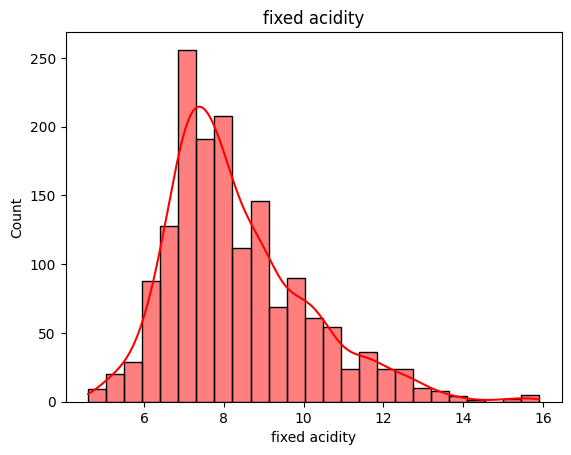

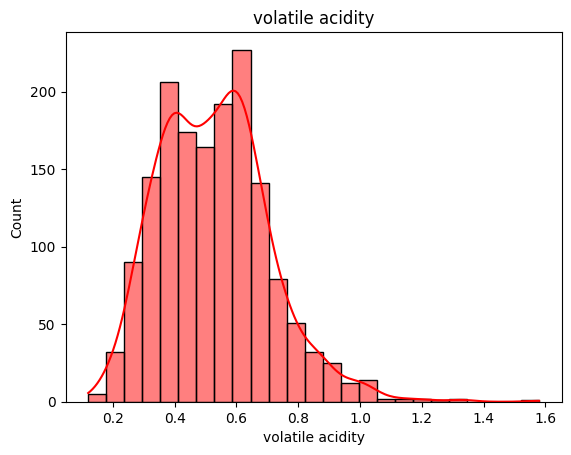

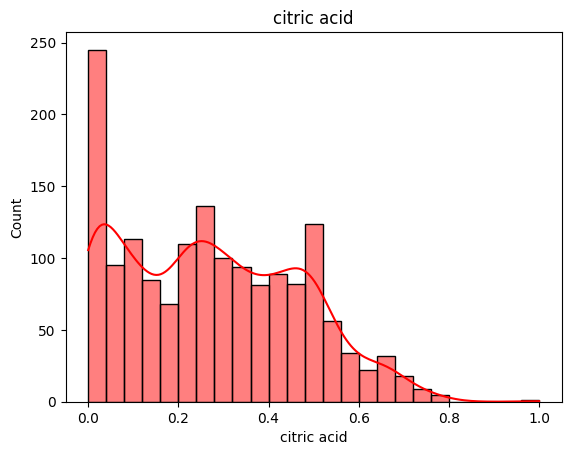

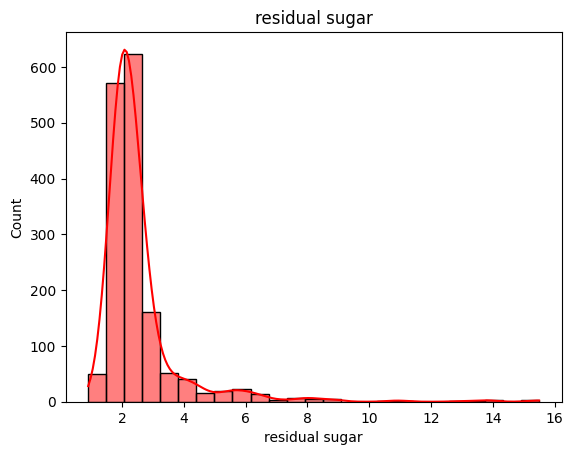

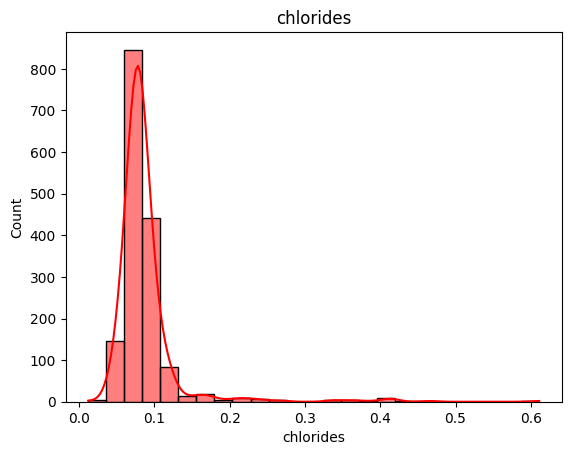

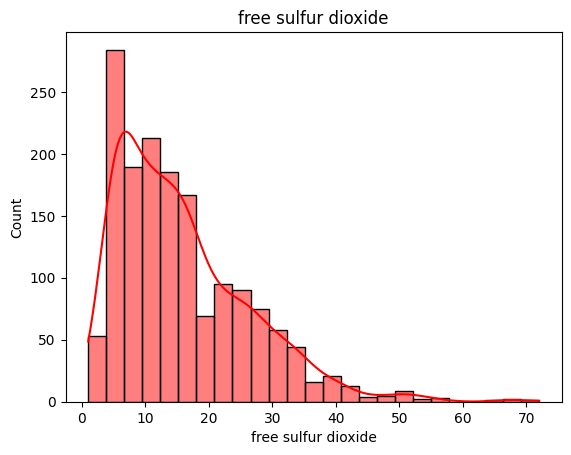

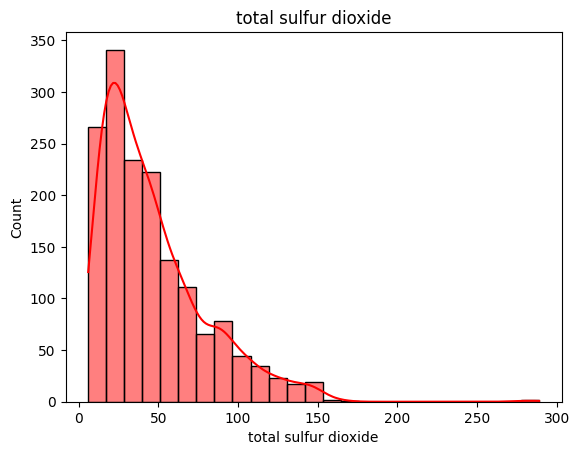

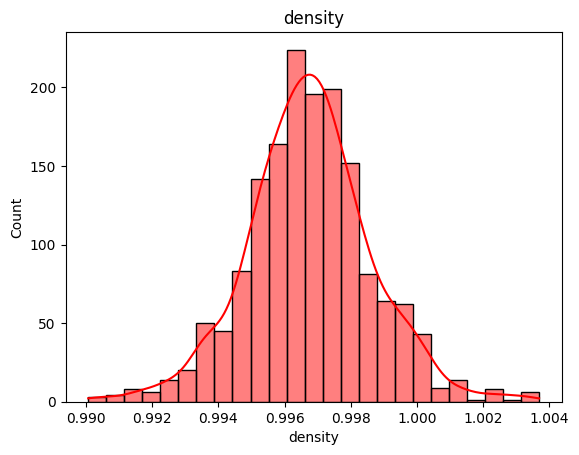

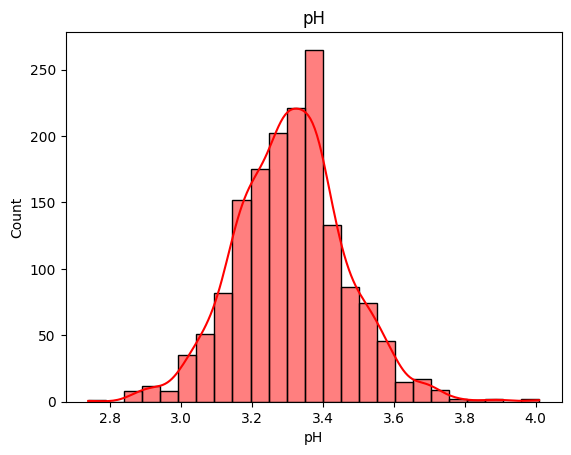

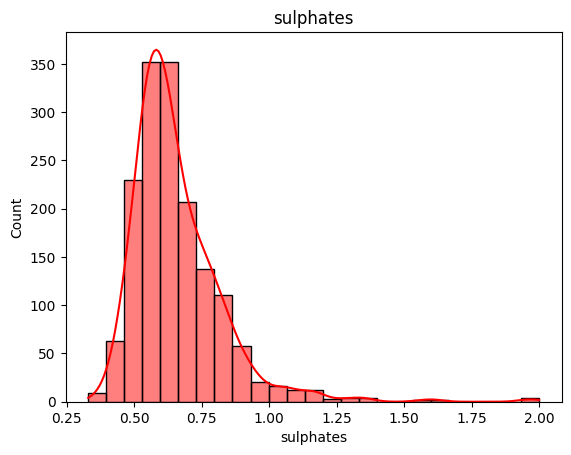

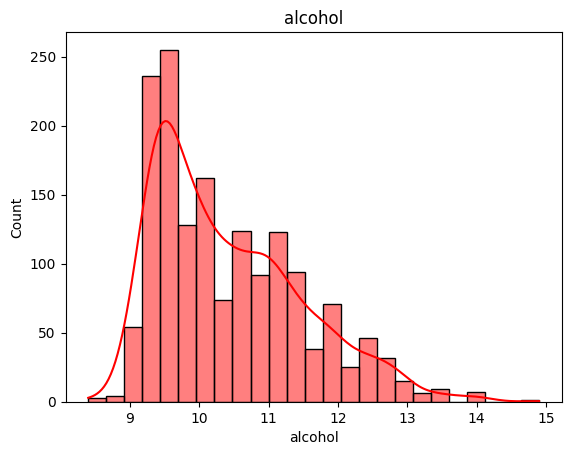

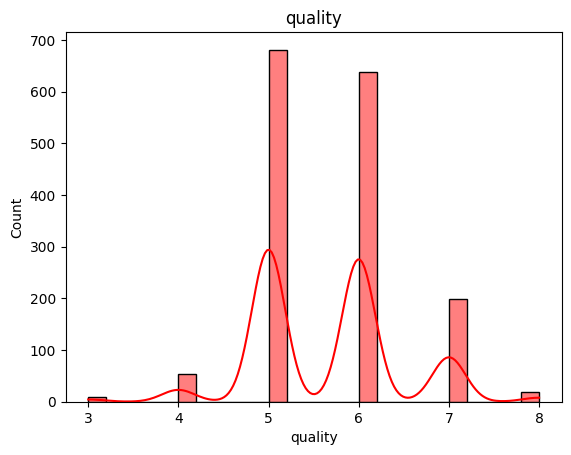

In [11]:
## Univariate analysis

for feature in numerical_features:
    data=df.copy()
    # data[feature].hist(bins=25,kernel='kde')
    sns.histplot(data[feature],kde=True,bins=25,color='red')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()



In [12]:
## statistical analysis

df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


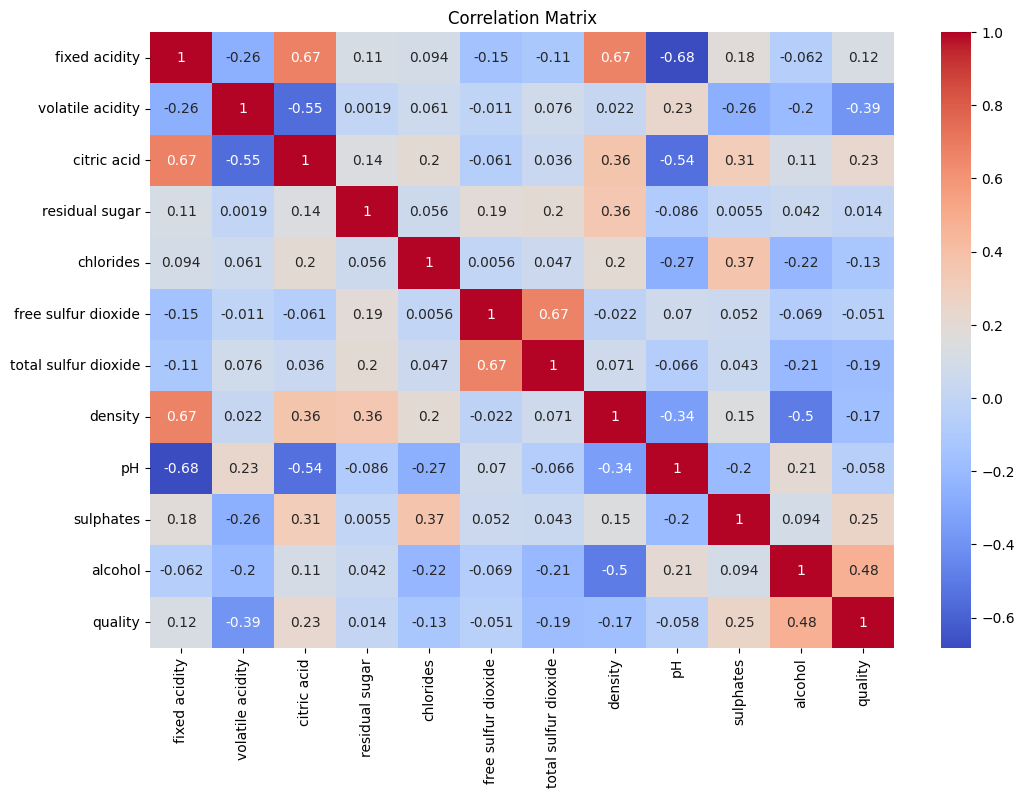

In [13]:
## Corelation , Heat map
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Conclusion
* The most influential factors positively affecting wine quality include high alcohol content, higher levels of citric acid, and sulphates.
* Factors negatively affecting wine quality include higher volatile acidity, free sulfur dioxide, and total sulfur dioxide.

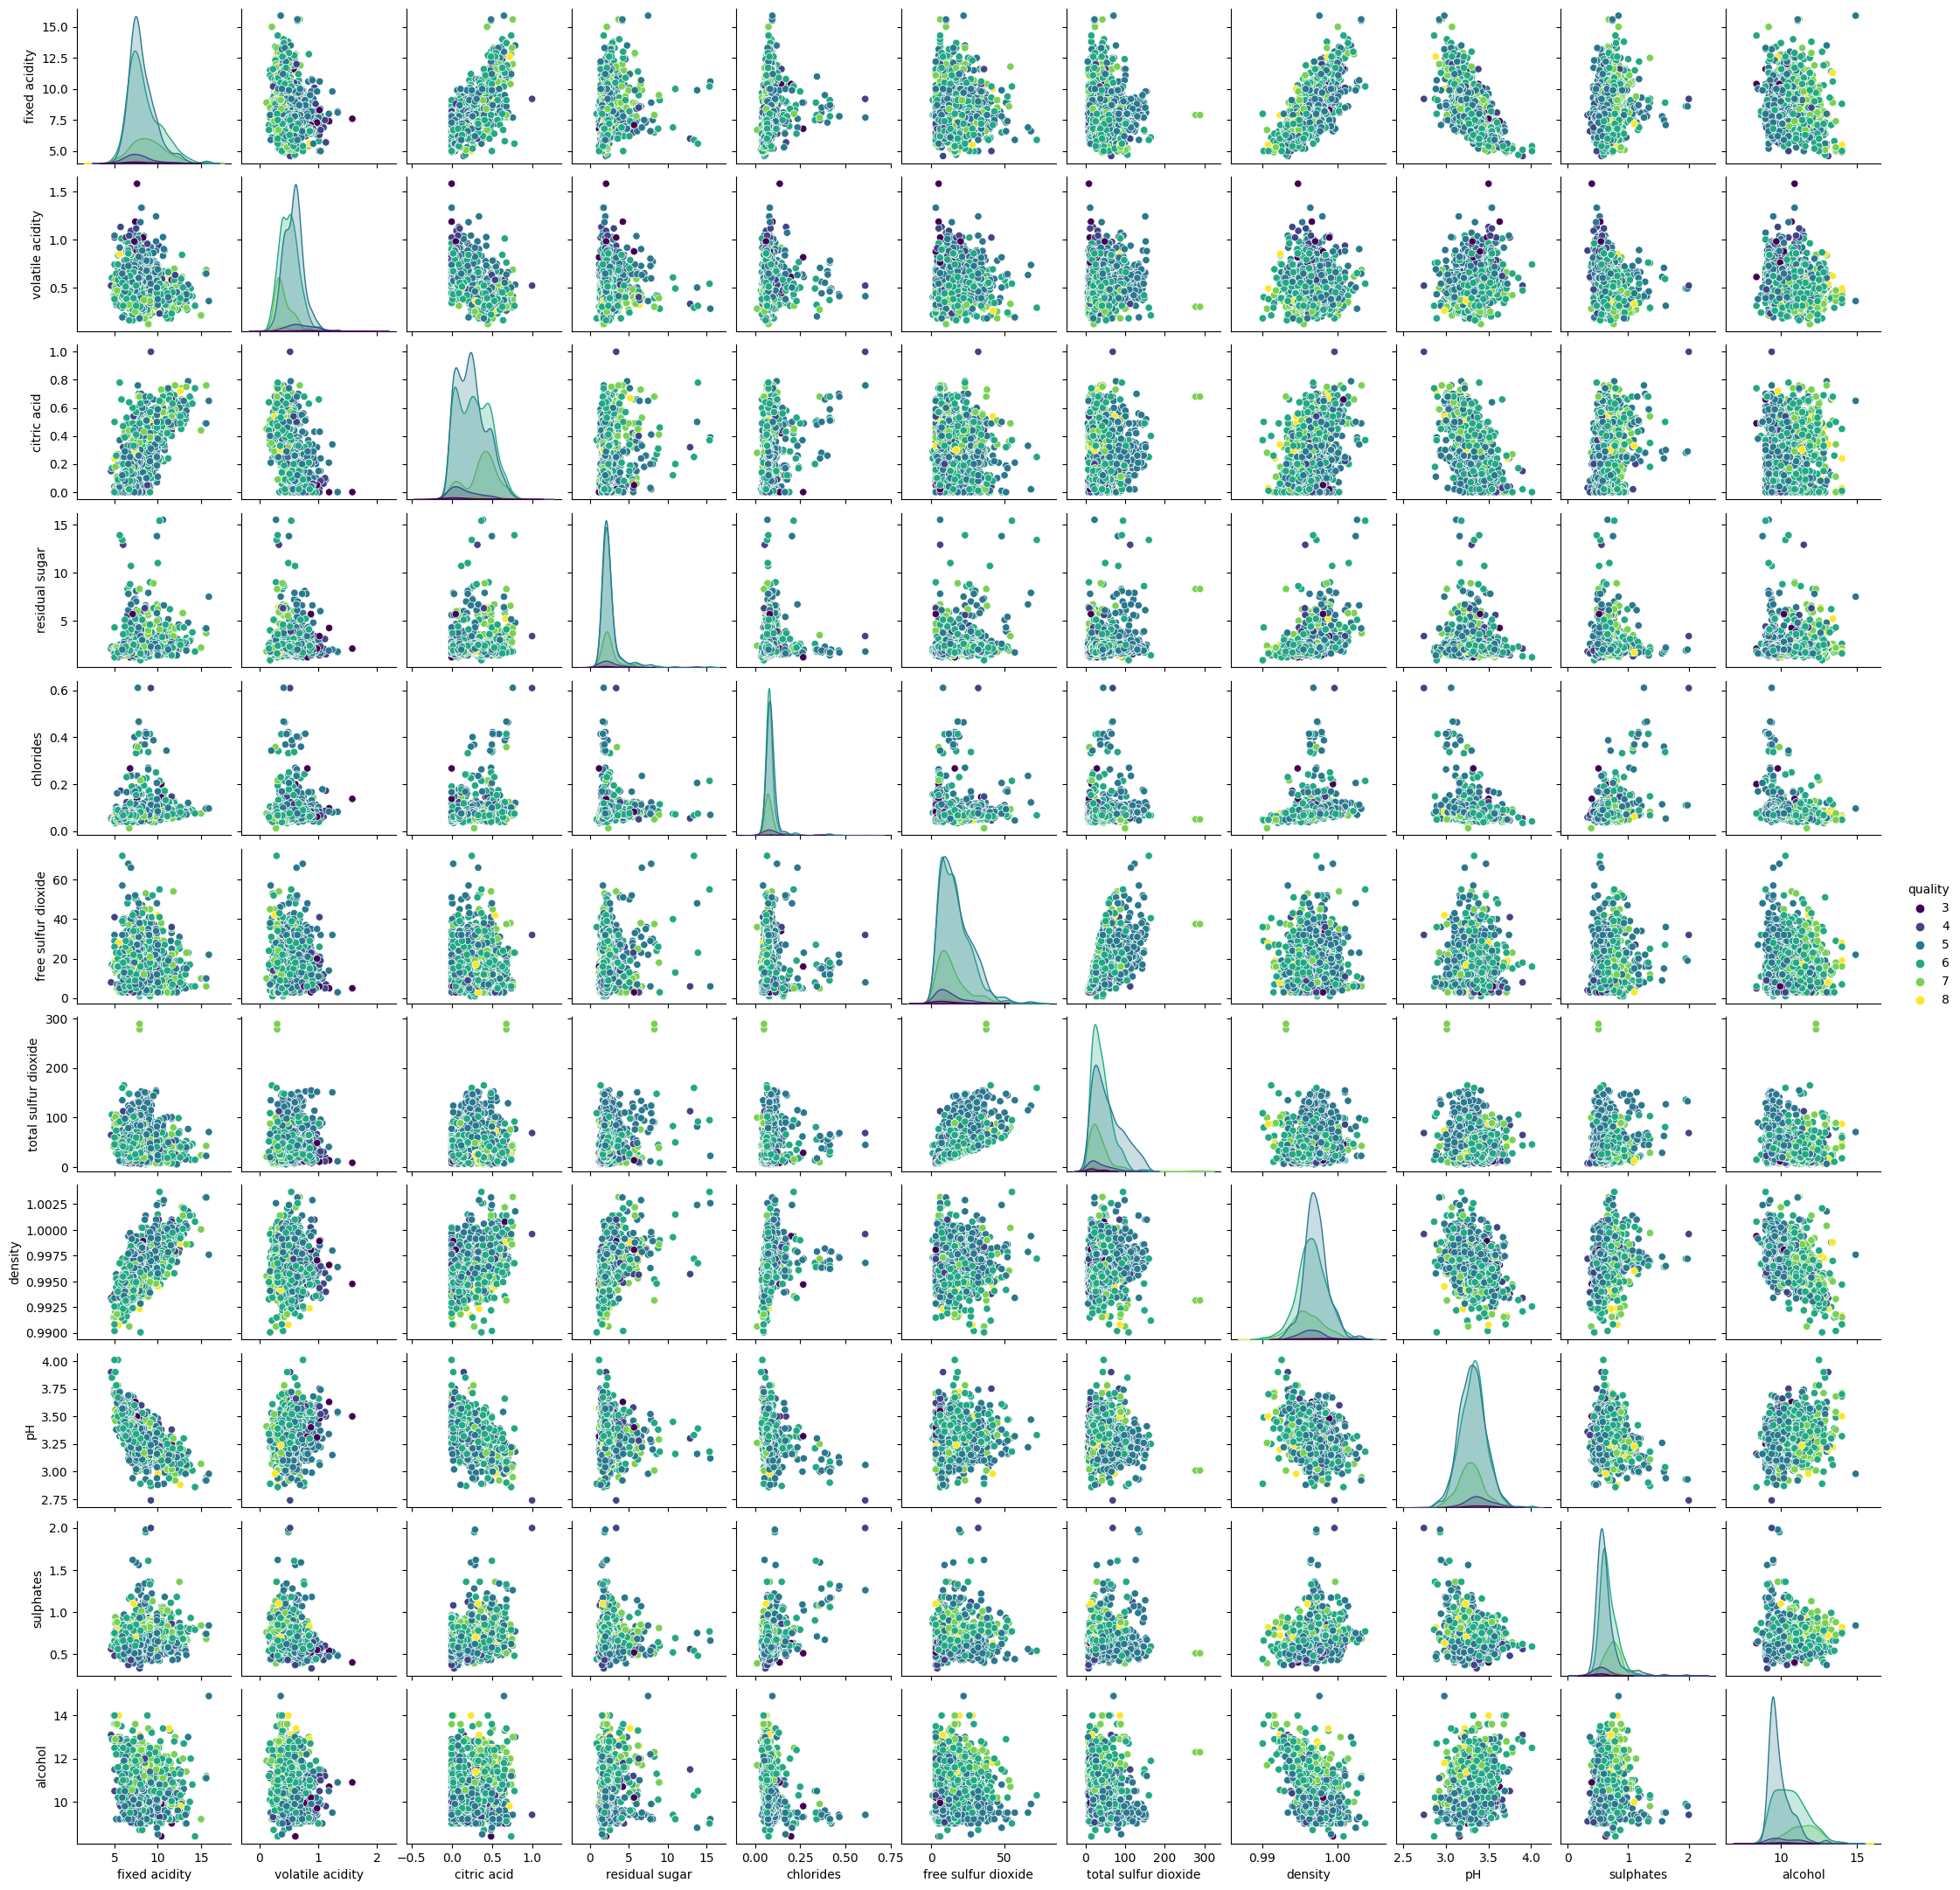

In [14]:
## Pairplot


sns.pairplot(df, diag_kind='kde', hue='quality', palette='viridis', height=2)
plt.show()





## Preprocessing the dataset

In [15]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

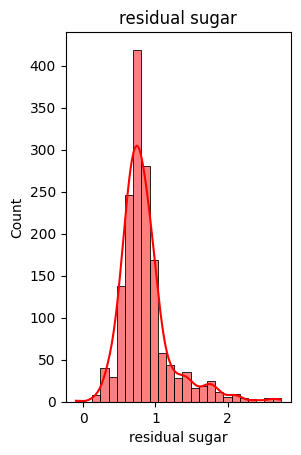

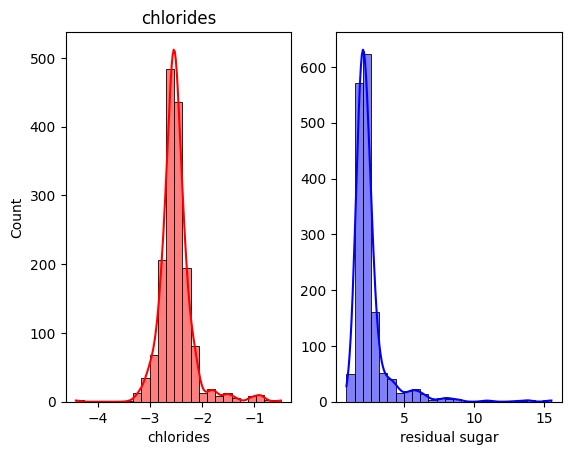

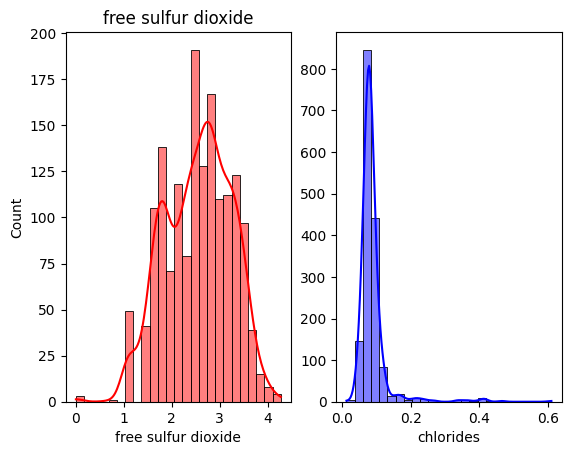

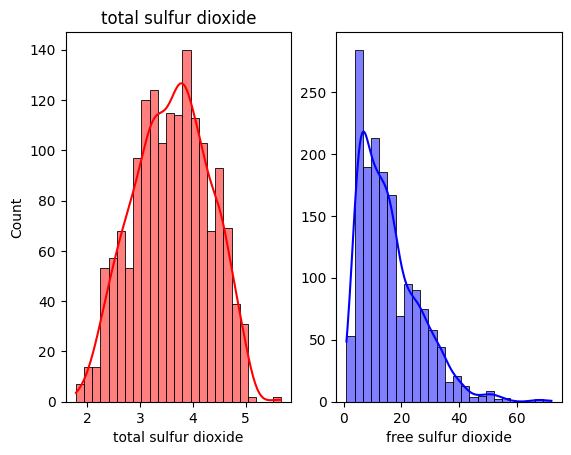

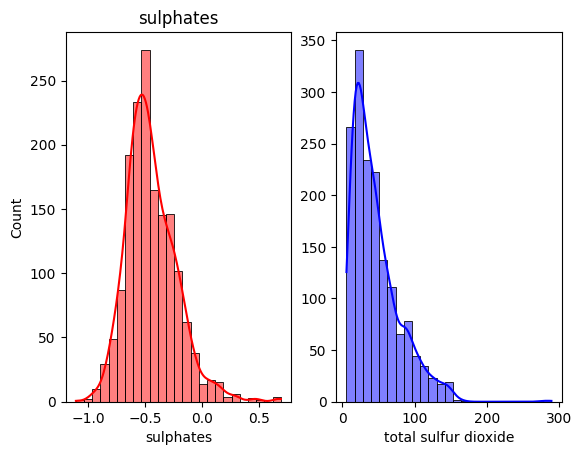

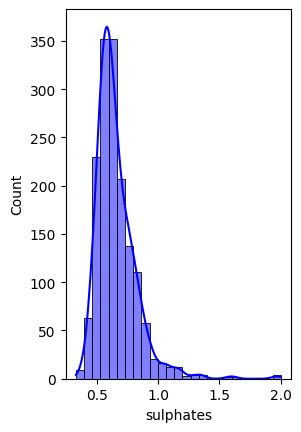

In [16]:
# Log Transformations

log_dist=['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']

for feature in log_dist:
    data=df.copy()
    data[feature]=np.log(data[feature])
    plt.subplot(1,2,1)
    sns.histplot(data[feature],kde=True,bins=25,color='red')

    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

    plt.subplot(1,2,2)

    sns.histplot(df[feature],kde=True,bins=25,color='blue')



In [ ]:
# from sklearn.preprocessing import FunctionTransformer

# # Define the log transformation function
# log_transformer = FunctionTransformer(np.log1p, validate=True)



# for feature in log_dist:
#     df[feature] = log_transformer.fit_transform(df[feature].values.reshape(-1, 1))

In [17]:

    df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [32]:
# Train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.2,random_state=42)

In [33]:
# standard scaling

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

x_train= scaler.fit_transform(x_train)





### Wrapper to track the time taken by Functions

In [34]:
def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"{func.__name__} took {elapsed_time:.4f} seconds.")
        return result
    return wrapper

## Model training

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model=SVC()
svm_model.fit(x_train,y_train)










SVC()

In [36]:
from sklearn.metrics import accuracy_score

x_test=scaler.transform(x_test)
y_pred=svm_model.predict(x_test)
result=accuracy_score(y_test,y_pred)
print(result)

0.603125


In [37]:
# model building and training
from sklearn.svm import SVC

def train_svm_model(C,gamma):
    svm_model=SVC(C=C,gamma=gamma)
    svm_model.fit(x_train,y_train)
    return svm_model

# svm_model=SVC()
# svm_model.fit(x_train,y_train)

In [38]:
# Accuracy

from sklearn.metrics import accuracy_score

def Calculate_accuracy_score(y,x,model):

    # x=scaler.transform(x)
    y_pred=model.predict(x)
    result=accuracy_score(y,y_pred)
    print(result)
    return result





In [39]:
## RandomSearchCV

from sklearn.model_selection import RandomizedSearchCV


@profile(precision=4)
@timing_decorator
def random_searchCV() :
    param={

        'C': [0.1,1,10,100],
        'gamma': [1,0.1,0.01,0.001,0.0001],
    }

    random_search=RandomizedSearchCV(svm_model,param_distributions=param,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

    random_search.fit(x_train,y_train)

    print(random_search.best_params_)
    print(random_search.best_estimator_)
    print(random_search.best_score_)


In [40]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

@profile(precision=4)
@timing_decorator
def gridSearchCV():

    param={

        'C': [0.1,1,10,100],
        'gamma': [1,0.1,0.01,0.001,0.0001],
    }

    grid_search=GridSearchCV(svm_model,param_grid=param,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

    grid_search.fit(x_train,y_train)

    print(grid_search.best_params_)
    print(grid_search.best_estimator_)
    print(grid_search.best_score_)

In [41]:
Calculate_accuracy_score(y=y_test,x=x_test,model=svm_model)


0.603125


0.603125

In [42]:

random_searchCV()

ERROR: Could not find file <ipython-input-34-a72306f809c9>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'gamma': 0.1, 'C': 100}
SVC(C=100, gamma=0.1)
0.6137867647058823
random_searchCV took 1.5678 seconds.


In [46]:
model1=train_svm_model(C=100,gamma=0.1)
Calculate_accuracy_score(y=y_test,x=x_test,model=model1)

0.615625


0.615625

In [44]:
gridSearchCV()

ERROR: Could not find file <ipython-input-34-a72306f809c9>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 1, 'gamma': 1}
SVC(C=1, gamma=1)
0.6528768382352942
gridSearchCV took 6.5996 seconds.


In [45]:
model2=train_svm_model(C=1,gamma=1)
Calculate_accuracy_score(y=y_test,x=x_test,model=model2)

0.65


0.65

In [48]:
random_searchCV()


ERROR: Could not find file <ipython-input-34-a72306f809c9>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'gamma': 1, 'C': 1}
SVC(C=1, gamma=1)
0.6528768382352942
random_searchCV took 1.5056 seconds.


In [49]:
gridSearchCV()

ERROR: Could not find file <ipython-input-34-a72306f809c9>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 1, 'gamma': 1}
SVC(C=1, gamma=1)
0.6528768382352942
gridSearchCV took 9.1422 seconds.


# Conclusion ~
# Random Search vs. Grid Search:

## Random Search vs. Grid Search:
- Random Search (`random_searchCV`) explores a random subset of hyperparameter combinations, while Grid Search (`gridSearchCV`) systematically evaluates all combinations in a predefined grid.

## Execution Time and Accuracy:
- Random Search took approximately 1.51 seconds and achieved an accuracy of 0.6529, while Grid Search took longer (9.14 seconds) but also achieved an accuracy of 0.6529.

## Trade-off Between Time and Accuracy:
- Random Search tends to take less time but may sometimes give suboptimal hyperparameters. In this case, both Random Search and Grid Search resulted in similar accuracy scores.

## Error in Memory Profiling:
- Both Random Search and Grid Search show an error related to memory profiling (`%mprun`). This error indicates that memory profiling might not be reliable in the IPython environment for these functions defined interactively.

## Recommendation:
- Considering the trade-off between time and accuracy, the choice between Random Search and Grid Search depends on the specific requirements of the problem. In this scenario, both methods provided similar accuracy, with Random Search being more time-efficient.

## Further Considerations:
- The discrepancy in time between Random Search and Grid Search might be influenced by the specific problem, dataset, or the characteristics of the hyperparameter search space. Further investigation and experimentation could provide insights into the factors influencing the performance of different search strategies.

## Note on Memory Profiling:
- The error in memory profiling does not affect the main results but highlights the limitations of using memory profiling in an interactive environment like IPython.

## Conclusion:
- Both Random Search and Grid Search found reasonable hyperparameters, with Grid Search achieving a slightly higher accuracy. The experiment emphasizes the importance of considering the specific characteristics of the problem and the available resources when choosing a hyperparameter search strategy.
